In [2]:
#Import the library used
import pandas as pd
import numpy as np

In [3]:
#Read the loan.csv file as dataframe
Loan = pd.read_csv("loan.csv")
Loan.head()

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_16940\3617640580.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  Loan = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Understanding



In [4]:
#figure out the no. of rows and columns
Loan.shape

(39717, 111)

In [5]:
#As we can see that the data set is very huge, we need to figure out what data is not relevent and remove it in our cleaning section
#To do so 1st we need to identify max(more than 75%) percentage of null value columns
nullPercentage = round(Loan.isnull().mean()*100,2) 

In [6]:
nullPercentage.head(30)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
pymnt_plan                 0.00
url                        0.00
desc                      32.58
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq    64.66
mths_since_last_record    92.99
dtype: float64

In [7]:
nullPercentage.tail(30)

mo_sin_old_rev_tl_op              100.00
mo_sin_rcnt_rev_tl_op             100.00
mo_sin_rcnt_tl                    100.00
mort_acc                          100.00
mths_since_recent_bc              100.00
mths_since_recent_bc_dlq          100.00
mths_since_recent_inq             100.00
mths_since_recent_revol_delinq    100.00
num_accts_ever_120_pd             100.00
num_actv_bc_tl                    100.00
num_actv_rev_tl                   100.00
num_bc_sats                       100.00
num_bc_tl                         100.00
num_il_tl                         100.00
num_op_rev_tl                     100.00
num_rev_accts                     100.00
num_rev_tl_bal_gt_0               100.00
num_sats                          100.00
num_tl_120dpd_2m                  100.00
num_tl_30dpd                      100.00
num_tl_90g_dpd_24m                100.00
num_tl_op_past_12m                100.00
pct_tl_nvr_dlq                    100.00
percent_bc_gt_75                  100.00
pub_rec_bankrupt

>Need to remove customer Behaviour variables also, as these are irrelevant for prediction of credit approval. example: open_acc, pub_rec, revol_bal, revol_until, total_acc etc 

# Data Cleaning

In [8]:
#Drop the columns with more then 75% null values 

percentage = 75.0
threshold =  int(((100-percentage)/100)*Loan.shape[0] + 1)
New_Loan_df = Loan.dropna(axis=1, thresh=threshold)

In [9]:
#Look for the info after deleting the columns
New_Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [10]:
# We can see in the above info that there are 2 columns(mths_since_last_delinq and desc) which have more null values
#Now we will analize those two columns and take a decision that delete them or not after analysing 
New_Loan_df["mths_since_last_delinq"].value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [11]:
New_Loan_df["desc"].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              210
Debt Consolidation                                                                                                                                                                                                                                                                                                                                    

In [12]:
# The disc column is Loan description provided by the borrower, which is irrelivent to our requirement. We can drop this column
New_Loan_df = New_Loan_df.drop(['desc'], axis=1)

In [13]:
New_Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
#Still by looking into the column name and discription in the Data Dictionary we can figure out more irrelevent columns
#example : addr_state, emp_title, zip_code, addr_state, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_bal, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, application_type
#All the columns given above are customer behavior variables are not available at the time of loan application and hence can't be used as a predictor for credit approval
New_Loan_df.drop(['addr_state', 'emp_title', 'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type'],axis=1,inplace=True)

In [15]:
New_Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

In [18]:
#from the above, we can observe that "int_rate"column is object type. Just have a look into the column
New_Loan_df.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [19]:
#we can observe that the datatype here for the above column is object, we need to remove the % sign and covert it to float so that if required we can use it for calculations
New_Loan_df['int_rate'] = New_Loan_df['int_rate'].str.rstrip('%')
New_Loan_df['int_rate'] = New_Loan_df['int_rate'].astype(float)
New_Loan_df.int_rate.info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


In [20]:
New_Loan_df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [21]:
# column "loan_status" is very important column as it will tell which are the customers the customers who are "Charged Off"... lets dig more into the column
New_Loan_df.loan_status.head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
Name: loan_status, dtype: object

In [27]:
# As the one marked 'Current' are neither fully paid nor the defaulted so we can git rid of those rows marked 'current'
# get names of indexes for which column "loan_status" has marked 'Current'
index_names_current = New_Loan_df[ New_Loan_df['loan_status'] == 'Current' ].index

In [28]:
# drop the above row indexes(index_names_current) from dataFrame
New_Loan_df.drop(index_names_current, inplace = True)

In [29]:
# Revalidate the column again
New_Loan_df.loan_status.head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
5     Fully Paid
Name: loan_status, dtype: object

In [31]:
#Now create a new categorical column "loan_status_category" w.r.t the "loan_status" column with value 1 for Charged Off and 0 for Fully Paid
New_Loan_df["loan_status_category"] = New_Loan_df.loan_status.apply(lambda x : 0 if x == "Fully Paid" else 1)

In [32]:
New_Loan_df["loan_status_category"].head()

0    0
1    1
2    0
3    0
5    0
Name: loan_status_category, dtype: int64

In [33]:
# we can further look into the % distribution of 1 and 0
(New_Loan_df.loan_status_category.value_counts()*100)/len(New_Loan_df)

0    85.413588
1    14.586412
Name: loan_status_category, dtype: float64

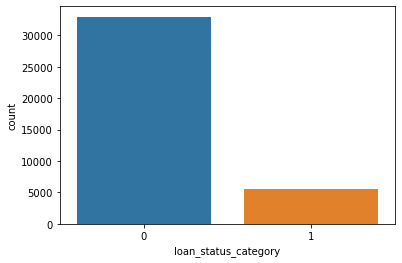

In [34]:
#we can visvalize the above in countplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ='loan_status_category', data = New_Loan_df)
 
# Show the plot
plt.show()

In [35]:
#Now we need to analyse that who are the customers getting more charged off
#Before this look for the datafram once again if we can remove some more columns
New_Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  float64
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_length                  37544 non-null  object 
 11  home_ownership              38577 non-null  object 
 12  annual_inc                  38577 non-null  float64
 13  verification_status         385

In [36]:
# Delete few more columns wich are not required(relevant) for our analysis
New_Loan_df.drop(["member_id","url","mths_since_last_delinq"],axis=1,inplace=True)
New_Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   loan_amnt                   38577 non-null  int64  
 2   funded_amnt                 38577 non-null  int64  
 3   funded_amnt_inv             38577 non-null  float64
 4   term                        38577 non-null  object 
 5   int_rate                    38577 non-null  float64
 6   installment                 38577 non-null  float64
 7   grade                       38577 non-null  object 
 8   sub_grade                   38577 non-null  object 
 9   emp_length                  37544 non-null  object 
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  issue_d                     385

In [41]:
# Now we have to figure out the relationship between "loan_status_category" column and the other columns
# So that we can identify that what are the various factors which are tending the customer for Charged Off
# Start from the "term" column
New_Loan_df.term.head(10)

0      36 months
1      60 months
2      36 months
3      36 months
5      36 months
6      60 months
7      36 months
8      60 months
9      60 months
10     60 months
Name: term, dtype: object

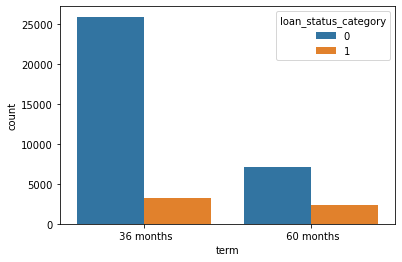

In [44]:
# loan_status_category = 0 means Fully paid and loan_status_category = 1 means Charged Off
chart1 = sns.countplot(x="term",data=New_Loan_df,hue='loan_status_category')

In [45]:
#From the above chart its clear that customers who has taken loan for longer period have more defaulters
# Now we will look for other column "int_rate" w.r.t loan_status_category
New_Loan_df.int_rate.head(10)

0     10.65
1     15.27
2     15.96
3     13.49
5      7.90
6     15.96
7     18.64
8     21.28
9     12.69
10    14.65
Name: int_rate, dtype: float64

In [47]:
# As we can see from the above data that the interest rate is having scattered values we can create bins to hold the values for this column
New_Loan_df.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [51]:
New_Loan_df['int_rate_bin'] = pd.cut(New_Loan_df['int_rate'], [0, 10, 15, 20, 25], labels=['0-10', '10-15', '15-20', '20 or more'])
New_Loan_df['int_rate_bin'].head(20)

0          10-15
1          15-20
2          15-20
3          10-15
5           0-10
6          15-20
7          15-20
8     20 or more
9          10-15
10         10-15
11         10-15
12         10-15
13          0-10
14         10-15
15         15-20
16         15-20
17          0-10
18         10-15
19          0-10
20         15-20
Name: int_rate_bin, dtype: category
Categories (4, object): ['0-10' < '10-15' < '15-20' < '20 or more']

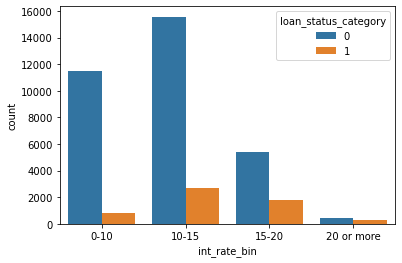

In [52]:
chart2 = sns.countplot(x="int_rate_bin",data=New_Loan_df,hue='loan_status_category')

By the above plot we can say that the customers who have higher intrest(more then 15%) rate are likely to default 
and the customer with lesser intrest rate are less likely to default

In [54]:
#Now we will look into the column "grade" w.r.t loan_status_category
New_Loan_df.grade.head()

0    B
1    C
2    C
3    C
5    A
Name: grade, dtype: object

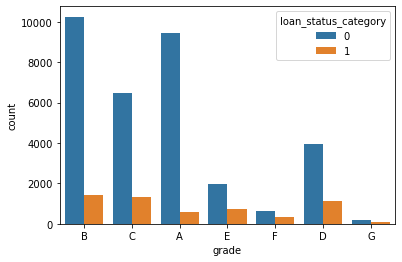

In [55]:
chart3 = sns.countplot(x="grade",data=New_Loan_df,hue='loan_status_category')

By looking into this plot we can say that the Customer with the grade A are less likely to default but when the grade is increasing the defaulter percentage is also increasing

In [59]:
#Now we will look into the column "home_ownership" w.r.t loan_status_category
New_Loan_df.home_ownership.head()

0    RENT
1    RENT
2    RENT
3    RENT
5    RENT
Name: home_ownership, dtype: object

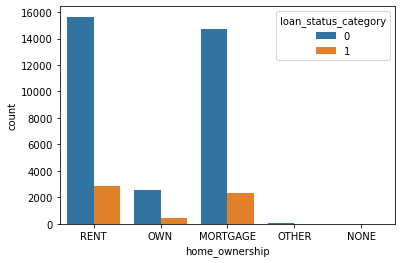

In [60]:
chart4 = sns.countplot(x="home_ownership",data=New_Loan_df,hue='loan_status_category')

With this plot we can say that the customer with own home are applying less for loan, in other words the customers with Rented home and Mortagage are more in numbers. 

In [61]:
#Now we will look into the column "loan_amnt" w.r.t loan_status_category
New_Loan_df.loan_amnt.head()

0     5000
1     2500
2     2400
3    10000
5     5000
Name: loan_amnt, dtype: int64

In [63]:
#The loan amount has the scattered values so we have to bind them in a bin and then plot it 
New_Loan_df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [67]:
New_Loan_df['loan_amnt_bin'] = pd.cut(New_Loan_df['loan_amnt'], [500, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['500-5K', '5-10K', '10-15K', '15-20K', '20-25K', '25-30K', '30K or more'])
New_Loan_df['loan_amnt_bin'].head(10)

0     500-5K
1     500-5K
2     500-5K
3      5-10K
5     500-5K
6      5-10K
7     500-5K
8      5-10K
9      5-10K
10     5-10K
Name: loan_amnt_bin, dtype: category
Categories (7, object): ['500-5K' < '5-10K' < '10-15K' < '15-20K' < '20-25K' < '25-30K' < '30K or more']

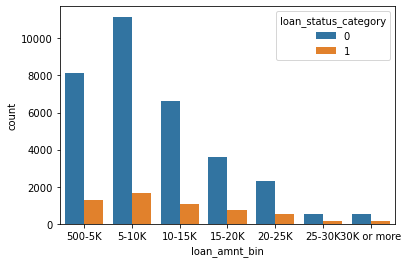

In [68]:
chart5 = sns.countplot(x="loan_amnt_bin",data=New_Loan_df,hue='loan_status_category')

By looking into this plot we can say that the customers has taken more lone for amount 500 to 20000 and if the loan amount is high then there are more chances of defaulters

In [69]:
New_Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          38577 non-null  int64   
 1   loan_amnt                   38577 non-null  int64   
 2   funded_amnt                 38577 non-null  int64   
 3   funded_amnt_inv             38577 non-null  float64 
 4   term                        38577 non-null  object  
 5   int_rate                    38577 non-null  float64 
 6   installment                 38577 non-null  float64 
 7   grade                       38577 non-null  object  
 8   sub_grade                   38577 non-null  object  
 9   emp_length                  37544 non-null  object  
 10  home_ownership              38577 non-null  object  
 11  annual_inc                  38577 non-null  float64 
 12  verification_status         38577 non-null  object  
 13  issue_d         

In [71]:
#Few more columns are there which we can remove
New_Loan_df.drop(["policy_code","initial_list_status","pymnt_plan"],axis=1,inplace=True)
New_Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          38577 non-null  int64   
 1   loan_amnt                   38577 non-null  int64   
 2   funded_amnt                 38577 non-null  int64   
 3   funded_amnt_inv             38577 non-null  float64 
 4   term                        38577 non-null  object  
 5   int_rate                    38577 non-null  float64 
 6   installment                 38577 non-null  float64 
 7   grade                       38577 non-null  object  
 8   sub_grade                   38577 non-null  object  
 9   emp_length                  37544 non-null  object  
 10  home_ownership              38577 non-null  object  
 11  annual_inc                  38577 non-null  float64 
 12  verification_status         38577 non-null  object  
 13  issue_d         

In [72]:
#Now we will look for the column "emp_length" w.r.t loan_status_category
New_Loan_df.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
5      3 years
Name: emp_length, dtype: object

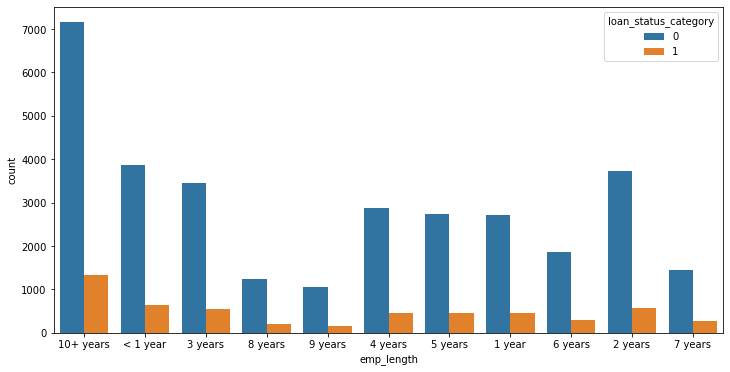

In [75]:
plt.figure(figsize=(12,6))
chart6 = sns.countplot(x="emp_length",data=New_Loan_df,hue='loan_status_category')
plt.show()

By looking into the plot we can say that the customers with lesser number of experience or no experience have more chances for default

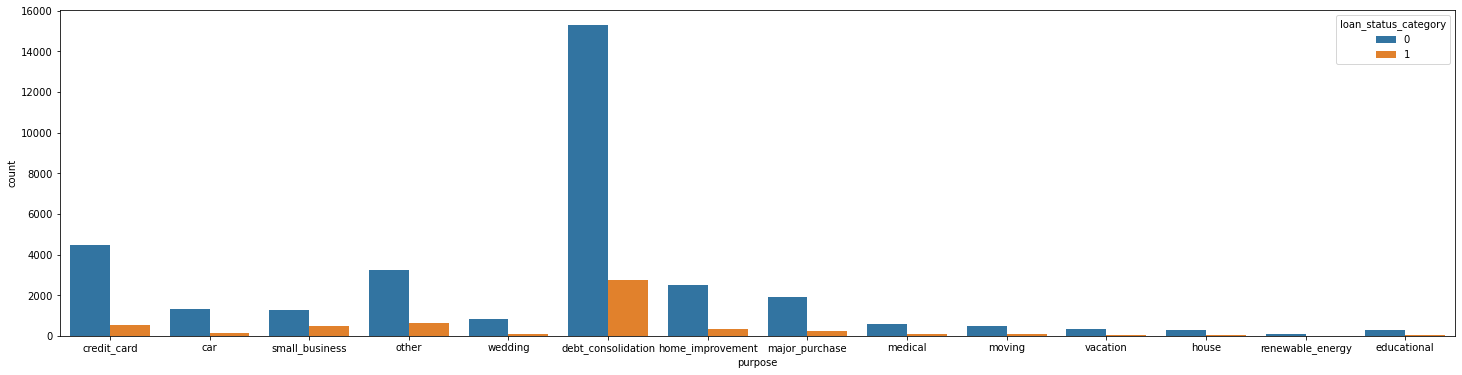

In [88]:
#Now we will look for the column "purpose" w.r.t loan_status_category
plt.figure(figsize=(25,6))
chart7 = sns.countplot(x="purpose",data=New_Loan_df,hue='loan_status_category')

From this plot we can say that the customer took loan maximum for debt_consolidation and for the same the refault rate is also high, means the customer taking loan for debt_consolidation are more likely to default